In [10]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter as Bsp
from scipy import constants as scc
import numpy as np
from pprint import pprint
from IPython.display import Markdown,display,Image
def printgras(string):
    display(Markdown(string))

printgras('**Téléchargement de la structure de bande**')
with MPRester("MioTRFvNPal5mnDV") as m:
    bands = m.get_bandstructure_by_material_id("mp-754777") #téléchargement de l'objet BandStructure

**Téléchargement de la structure de bande**

**Bandes électroniques du cristal**

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

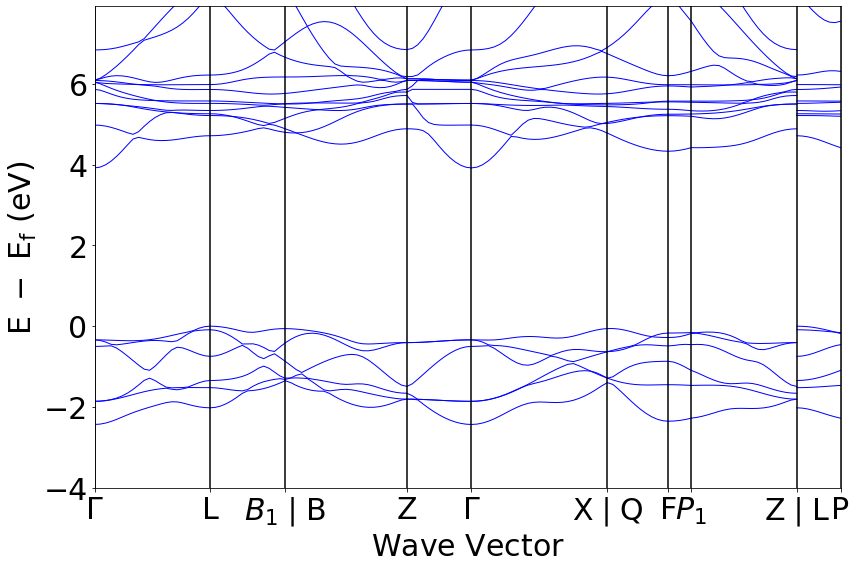

In [11]:
printgras("**Bandes électroniques du cristal**")
bs = Bsp(bands)
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)

In [12]:
printgras("**Détermination de la bande interdite**")
e_fermi = bands.efermi
print("Enérgie de Fermi :", e_fermi)
gap = bands.get_band_gap()
print("Information sur la bande interdite :", gap)
print("La bande est-elle métallique ?", bs.bs_plot_data().get("is_metal"))
print("")
print("La bande interdite est indirecte et se situe entre", 0+e_fermi, "eV et", gap.get('energy')+e_fermi, "eV. Son énergie est donc de", gap.get('energy'), ". De ces données, on peut conclure que nous sommes en présence d'un matériau :")
print("- isolant (énergie de bande comprise généralement entre 5 et 10 eV, ici 3,918)")
print("- non métallique (énergie de Fermi inférieure à l'énergie de Fermi d'un métal comprise entre 5 et 10 eV, ici 3,607)")

**Détermination de la bande interdite**

Enérgie de Fermi : 3.60762562
Information sur la bande interdite : {'direct': False, 'energy': 3.9187999999999996, 'transition': 'L-\\Gamma'}
La bande est-elle métallique ? False

La bande interdite est indirecte et se situe entre 3.60762562 eV et 7.5264256199999995 eV. Son énergie est donc de 3.9187999999999996 . De ces données, on peut conclure que nous sommes en présence d'un matériau :
- isolant (énergie de bande comprise généralement entre 5 et 10 eV, ici 3,918)
- non métallique (énergie de Fermi inférieure à l'énergie de Fermi d'un métal comprise entre 5 et 10 eV, ici 3,607)


La bande interdite est représentée en jaune. Les points bleus indiquent les minima de la bande de condution et les points mauves les maxima de la bande de valence.


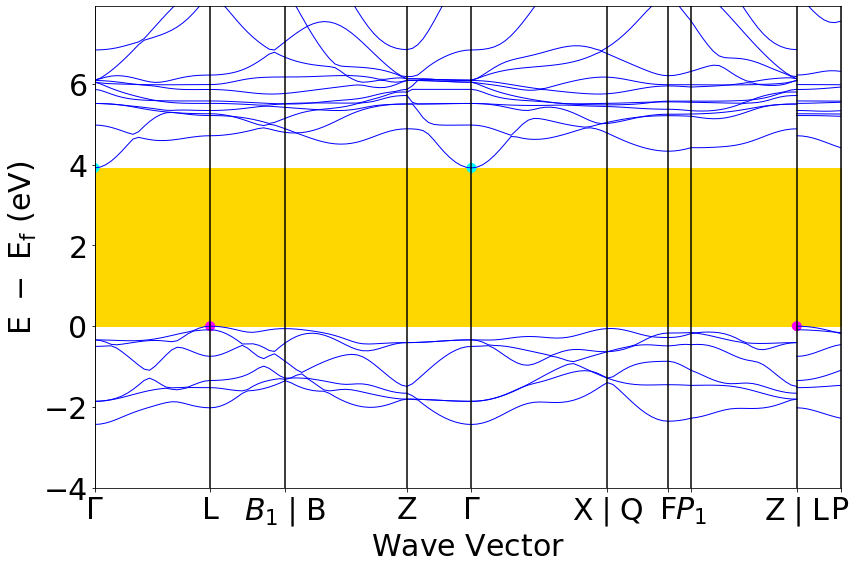

In [13]:
print('La bande interdite est représentée en jaune. Les points bleus indiquent les minima de la bande de condution et les points mauves les maxima de la bande de valence.')
data = bs.bs_plot_data()
ticksc = data.get("ticks")
ticksv = data.get("ticks")
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.fill_between(np.linspace(0, ticksv.get("distance")[-1], 500), 0, gap.get('energy'), color ='gold')
plt.scatter([0],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o') #marques des minima
plt.scatter([ticksc.get("distance")[6]],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o')
plt.scatter([ticksv.get("distance")[1]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o') #marques des maxima
plt.scatter([ticksv.get("distance")[13]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o')
plt.show()

In [63]:
printgras("**Recherche des dispersions maximales et minimales**")
print("On va procéder en plusieurs étapes :")
print("1. On détermine la dernière bande de valence et la première bande de conduction")
print("2. On va calculer les pentes pour chaque branche")
print("3. La dispersion est maximale (minimale) dans la branche où la pente est maximale (minimale) et suit la direction de cette dernière")

**Recherche des dispersions maximales et minimales**

On va procéder en plusieurs étapes :
1. On détermine la dernière bande de valence et la première bande de conduction
2. On va calculer les pentes pour chaque branche
3. La dispersion est maximale (minimale) dans la branche où la pente est maximale (minimale) et suit la direction de cette dernière


In [24]:
printgras("**Calcul des dispersions maximales et minimales pour la première bande de conduction et la dernière bande de valence**")
print("Nombre de bandes :", bands.nb_bands)
print("Comme nous avons 30 bandes, on peut déterminer avec les données du materials project que la première bande de conduction est la bande 15 et la dernière bande de valence la bande 14")
data = bs.bs_plot_data()#extraction des données de toutes les bandes

printgras("Bande de Conduction")#bande 15 = première bande de conduction

print("Energies")
energy0c = np.zeros((9))#vecteur des premières énergies de chaque branche
energy1c = np.zeros((9))#vecteur des dernières énergies de chaque branche
for i in range(0,9):
    energy0c[i] = (data.get("energy")[i].get("1")[15])[0] #on récupère la première énergie de la branche
    energy1c[i] = (data.get("energy")[i].get("1")[15])[-1] #on récupère la dernière énergie de la branche
    i = i+1
deltayc = energy1c-energy0c #calcul du deltaY entre la première et la dernière énergie de chaque branche
print(deltayc)

print("Distances")
ticksc = data.get("ticks")
distancec = np.zeros(9) #vecteur des longeurs entre 2 branches par exemple : entre gamma et L
l = 0

for j in range(1,15):
    if(ticksc.get("distance")[j]==ticksc.get("distance")[j-1]):
        j = j+1 #certaines valeurs étant en double on évite les doublons
    else:
        distancec[l] = ticksc.get("distance")[j]-ticksc.get("distance")[j-1] #calcul de la longueur entre 2 branches différentes
        l = l+1
        j = j+1
print(distancec)

print("Pentes")
pentec = (deltayc)/distancec #calcul de la pente en faisant deltaY/deltaX
print(pentec)
print("La pente Max est de", -np.max(abs(pentec)), "elle se situe entre les branches", ticksc.get("label")[4], "et", ticksc.get("label")[6])
print("La pente Min est de", np.min(abs(pentec)), "elle se situe entre les branches", ticksc.get("label")[3], "et", ticksc.get("label")[4] )

**Calcul des dispersions maximales et minimales pour la première bande de conduction et la dernière bande de valence**

Nombre de bandes : 30
Comme nous avons 30 bandes, on peut déterminer avec les données du materials project que la première bande de conduction est la bande 15 et la dernière bande de valence la bande 14


Bande de Conduction

Energies
[ 0.7971  0.0835  0.0884 -0.969   0.8628 -0.449   0.0885  0.4666 -0.2947]
Distances
[1.00276048 0.65037872 1.05614618 0.55953228 1.1784518  0.52807307
 0.1994304  0.91464945 0.37964625]
Pentes
[ 0.79490568  0.12838673  0.08370053 -1.73180357  0.73214705 -0.85026112
  0.44376383  0.5101408  -0.77624895]
La pente Max est de -1.7318035701293844 elle se situe entre les branches Z et $\Gamma$
La pente Min est de 0.08370053471705965 elle se situe entre les branches $B_1$$\mid$B et Z


In [15]:
printgras("Bande de valence")#bande 14 = dernière bande de valence
print("Energies")
energy0v = np.zeros((9))#vecteur des premières énergies de chaque branche
energy1v = np.zeros((9))#vecteur des dernières énergies de chaque branche
for i in range(0,9):
    energy0v[i] = (data.get("energy")[i].get("1")[14])[0] #on récupère la première énergie de la branche
    energy1v[i] = (data.get("energy")[i].get("1")[14])[-1] #on récupère la dernière énergie de la branche
    i = i+1
deltayv = energy1v-energy0v #calcul du deltaY entre la première et la dernière énergie de chaque branche
print(deltayv)
print("Distances")
ticksv = data.get("ticks")
distancev = np.zeros(9) #vecteur des longeurs entre 2 branches par exemple : entre gamma et L
l = 0

for j in range(1,15):
    if(ticksv.get("distance")[j]==ticksv.get("distance")[j-1]):
        j = j+1 #certaines valeurs étant en double on évite les doublons
    else:
        distancev[l] = ticksv.get("distance")[j]-ticksv.get("distance")[j-1] #calcul de la longueur entre 2 branches différentes
        l = l+1
        j = j+1
print(distancev)
print("Pentes")
pentev = (deltayv)/distancev #calcul de la pente en faisant deltaY/deltaX
print(pentev)
print("La pente Max est de", -np.max(abs(pentev)), "elle se situe entre les branches", ticksv.get("label")[13], "et", ticksv.get("label")[14])
print("La pente Min est de", np.min(abs(pentev)), "elle se situe entre les branches", ticksv.get("label")[9], "et", ticksv.get("label")[11] )

Bande de valence

Energies
[ 0.3392 -0.0603 -0.3462  0.0673  0.2802 -0.1108  0.0107 -0.2474 -0.1591]
Distances
[1.00276048 0.65037872 1.05614618 0.55953228 1.1784518  0.52807307
 0.1994304  0.91464945 0.37964625]
Pentes
[ 0.33826622 -0.09271521 -0.32779553  0.12027903  0.23776959 -0.20981945
  0.0536528  -0.27048614 -0.41907434]
La pente Max est de -0.419074340092564 elle se situe entre les branches Z$\mid$L et P
La pente Min est de 0.05365280197196695 elle se situe entre les branches F et $P_1$


Figure indiquant les dispersions

Les flèches vertes indiquent les dispersion minimales et les flèches rouges les dispersions maximales.


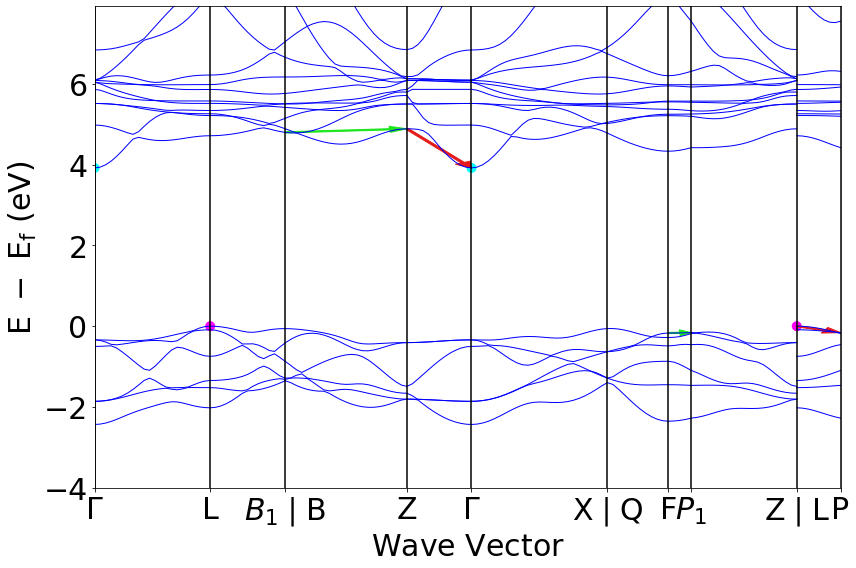

In [16]:
printgras("Figure indiquant les dispersions")
print("Les flèches vertes indiquent les dispersion minimales et les flèches rouges les dispersions maximales.")
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(ticksc.get("distance")[4], energy0c[3], distancec[3], deltayc[3], color=(0.9, 0.1, 0.1 ,1.0), width = 0.03, head_width = 0.15, head_length = 0.15, length_includes_head= True)
plt.arrow(ticksc.get("distance")[3], energy0c[2], distancec[2], deltayc[2], color=(0.1, 0.9, 0.1 ,1.0), width = 0.03, head_width = 0.15, head_length = 0.15, length_includes_head= True)
plt.arrow(ticksv.get("distance")[13], energy0v[8], distancev[8], deltayv[8], color=(0.9, 0.1, 0.1 ,1.0), width = 0.03, head_width = 0.15, head_length = 0.15, length_includes_head= True)
plt.arrow(ticksv.get("distance")[9], energy0v[6], distancev[6], deltayv[6], color=(0.1, 0.9, 0.1 ,1.0), width = 0.03, head_width = 0.15, head_length = 0.1, length_includes_head= True)
plt.scatter([0],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o') #marques des minima
plt.scatter([ticksc.get("distance")[6]],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o')
plt.scatter([ticksv.get("distance")[1]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o') #marques des maxima
plt.scatter([ticksv.get("distance")[13]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o')
plt.show()

In [17]:
printgras("**Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction**")
print("On va procéder en plusiseurs étapes :")
print("1. On détermine le point maximum/minimum de la bande de valence/conduction")
print("2. On approxime la bande électronique par une parabole ax^2+bx+c avec comme sommet ce point. Pour ça on prend un point proche et on détermine les constantes a,b et c du polynôme.")
print("3. On calcule la masse effective avec la formule suivante : ")

**Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction**

On va procéder en plusiseurs étapes :
1. On détermine le point maximum/minimum de la bande de valence/conduction
2. On approxime la bande électronique par une parabole ax^2+bx+c avec comme sommet ce point. Pour ça on prend un point proche et on détermine les constantes a,b et c du polynôme.
3. On calcule la masse effective avec la formule suivante : 


![](masse.png)

In [18]:
printgras("Bande de conduction")
xc = ticksc.get("distance")[6] #distance à laquelle se trouve le minimum de la bande de conduction (Gamma)
yc = gap.get('energy') #energie minimale de la bande de conduction
print("Les coordonnées du minimum de la bande de conduction sont : (", xc,",", yc, ")")
x2c = ticksc.get("distance")[5]+0.5*distancec[3] #coordonnées d'un point proche
y2c = (data.get("energy")[3].get("1")[15])[6]
print("Les coordonnées du point le plus proche choisi sont : (", x2c,",", y2c, ")")
print("L'équation de la parabole est de la forme ax^2+bx+c, avec a,b et c qui valent :")
ac = (y2c-yc)/(x2c-xc)**2 #formules pour déterminer les constantes
bc = -2*xc*ac
cc = yc+ac*xc*xc
print("a =", ac)
print("b =", bc)
print("c =", cc)

Bande de conduction

Les coordonnées du minimum de la bande de conduction sont : ( 3.268817663951198 , 3.9187999999999996 )
Les coordonnées du point le plus proche choisi sont : ( 2.9890515239819853 , 4.4533999999999985 )
L'équation de la parabole est de la forme ax^2+bx+c, avec a,b et c qui valent :
a = 6.830282286515357
b = -44.65389477586875
c = 76.90152000378895


On vérifie que la parabole approxime bien la bande de conduction au niveau du minimum


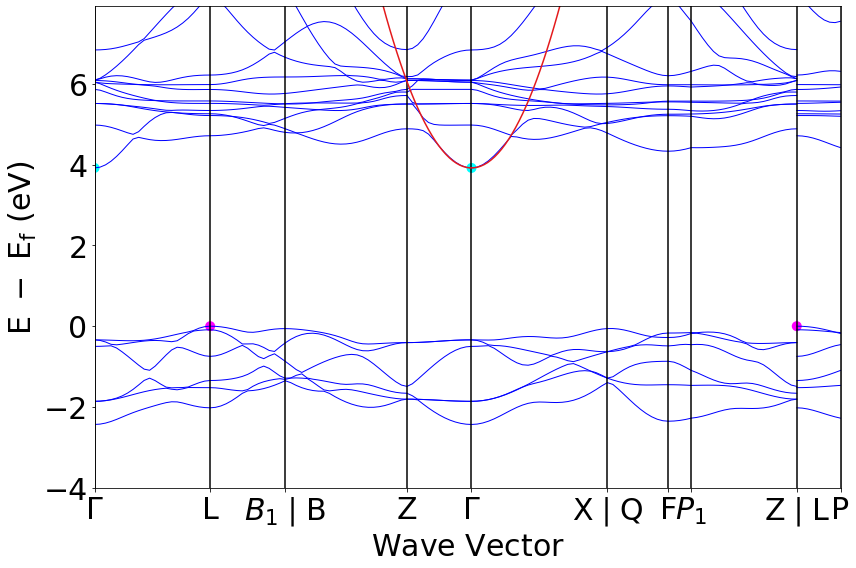

In [19]:
print("On vérifie que la parabole approxime bien la bande de conduction au niveau du minimum")
polynomc = np.polynomial.polynomial.Polynomial([cc,bc,ac]) #création du polynôme du second degré
abscissesc = np.linspace(1.5,4.5,100) #vecteur des abscisses pour tracer le graphe
ordonnéesc = np.zeros((100))
for i in range(0,100):
    ordonnéesc[i] = polynomc(abscissesc[i]) #vecteur des ordonnées pour tracer le graphe
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.plot(abscissesc, ordonnéesc)
plt.scatter([0],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o') #marques des minima
plt.scatter([ticksc.get("distance")[6]],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o')
plt.scatter([ticksv.get("distance")[1]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o') #marques des maxima
plt.scatter([ticksv.get("distance")[13]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o')
plt.show()

In [20]:
print("La dérivée seconde du polynôme est donnée par", 2*ac, "eV*A^2") #dérivée première : 2a*x+b, dérivée seconde : 2a
hbar = scc.hbar #constante de Planck [m^2*kg/s]
ev = 1.60218*10**(-19) #conversion eV --> Joule [kg*m^2/s^2]
angstrom = 10**(-20) #conversion des Angström^2 en m^2
divc = 2*ac*ev*angstrom
meffc = (hbar**2)/divc
print("La masse effective est", meffc, "kg")

La dérivée seconde du polynôme est donnée par 13.660564573030713 eV*A^2
La masse effective est 5.0812709444606955e-31 kg


In [21]:
printgras("Bande de Valence")
xv = ticksv.get("distance")[1] #distance à laquelle se trouve le maximum de la bande de valence (L)
yv = 0 #energie maximale de la bande de valence
print("Les coordonnées du maximum de la bande de valence sont : (", xv,",", yv, ")")
x2v = ticksv.get("distance")[1]+(8/15)*distancev[1] #coordonnées d'un point proche
y2v = (data.get("energy")[1].get("1")[14])[7]
print("Les coordonnées du point le plus proche connu sont : (", x2v,",", y2v, ")")
print("L'équation de la parabole est de la forme ax^2+bx+c, avec a,b et c qui valent :")
av = (y2v-yv)/(x2v-xv)**2 #formules pour déterminer les constantes
bv = -2*xv*av
cv = yv+av*xv*xv
print("a =", av)
print("b =", bv)
print("c =", cv)

Bande de Valence

Les coordonnées du maximum de la bande de valence sont : ( 1.0027604811723017 , 0 )
Les coordonnées du point le plus proche connu sont : ( 1.3496291333881665 , -0.1474000000000002 )
L'équation de la parabole est de la forme ax^2+bx+c, avec a,b et c qui valent :
a = -1.2250882594198518
b = 2.456940184988776
c = -1.2318612610554545


On vérifie que la parabole approxime bien la bande de valence au niveau du maximum


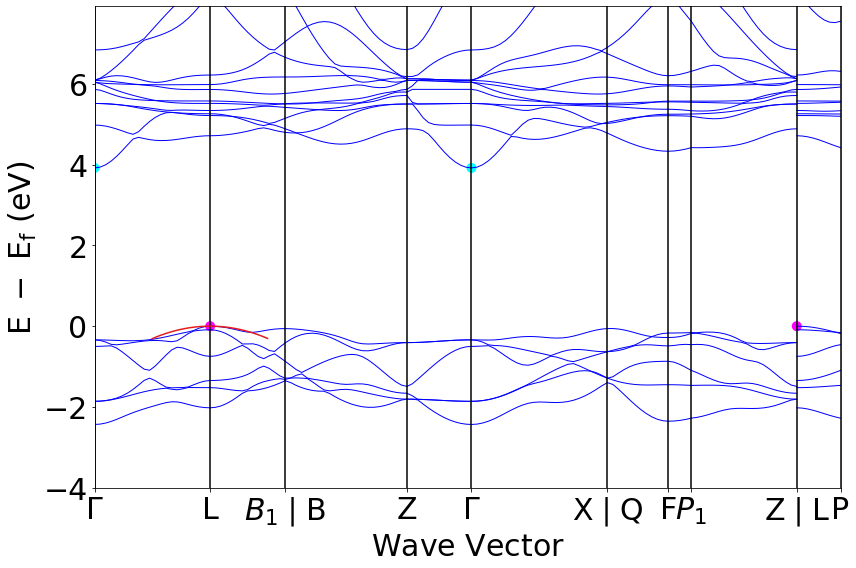

In [11]:
print("On vérifie que la parabole approxime bien la bande de valence au niveau du maximum")
polynomv = np.polynomial.polynomial.Polynomial([cv,bv,av]) #création du polynôme du second degré
abscissesv = np.linspace(0.5,1.5,100) #vecteur des abscisses pour tracer le graphe
ordonnéesv = np.zeros((100))
for i in range(0,100):
    ordonnéesv[i] = polynomv(abscissesv[i]) #vecteur des ordonnées pour tracer le graphe
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.plot(abscissesv, ordonnéesv)
plt.scatter([0],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o') #marques des minima
plt.scatter([ticksc.get("distance")[6]],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o')
plt.scatter([ticksv.get("distance")[1]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o') #marques des maxima
plt.scatter([ticksv.get("distance")[13]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o')
plt.show()

In [22]:
print("La dérivée seconde du polynôme est donnée par", 2*av, "eV/A^2") #dérivée première : 2a*x+b, dérivée seconde : 2a
divv = 2*abs(av)*ev*angstrom
meffv = (hbar**2)/divv
print("La masse effective est", meffv, "kg")

La dérivée seconde du polynôme est donnée par -2.4501765188397036 eV/A^2
La masse effective est 2.8329807797987175e-30 kg


In [23]:
print("On peut observer que nos deux masses effectives :", meffc, "et", meffv, "sont du même ordre de grandeur que la masse de l'électron (9,109e-31)")

On peut observer que nos deux masses effectives : 5.0812709444606955e-31 et 2.8329807797987175e-30 sont du même ordre de grandeur que la masse de l'électron (9,109e-31)
